In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [408]:
df=pd.read_csv("Boston Dataset.csv")

In [409]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [410]:
df=df.drop(['Unnamed: 0'], axis=1)

In [411]:
#statistical information
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [412]:
df.shape

(506, 14)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [414]:
#Null value
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [415]:
df = df[np.isfinite(df).all(1)]

In [416]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

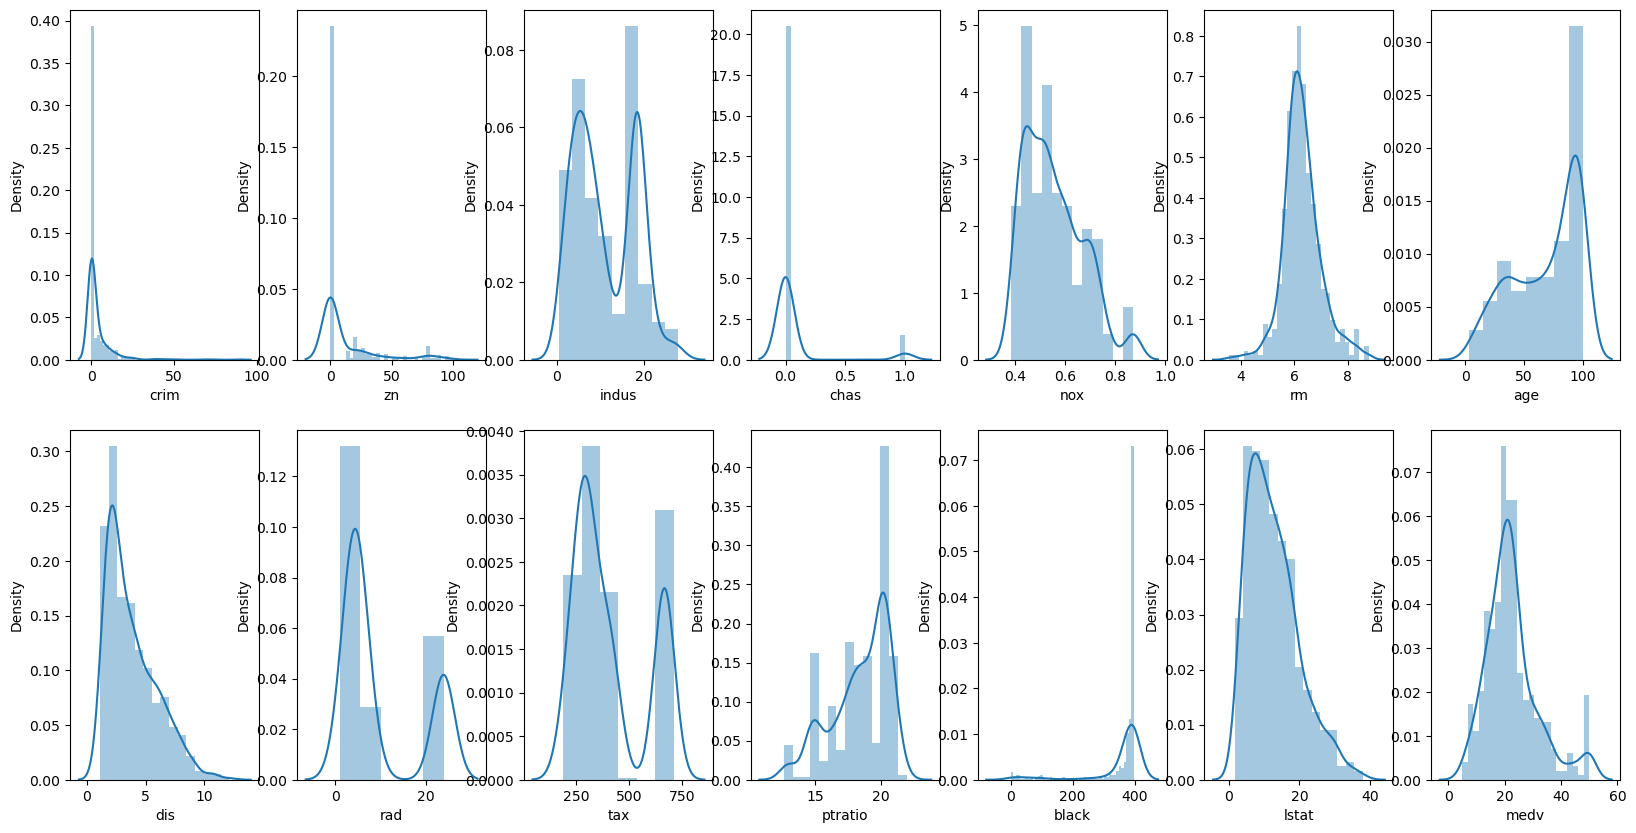

In [417]:
#create dist plots 
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in df.items():
    sb.distplot(value , ax=ax[ind])
    ind+=1



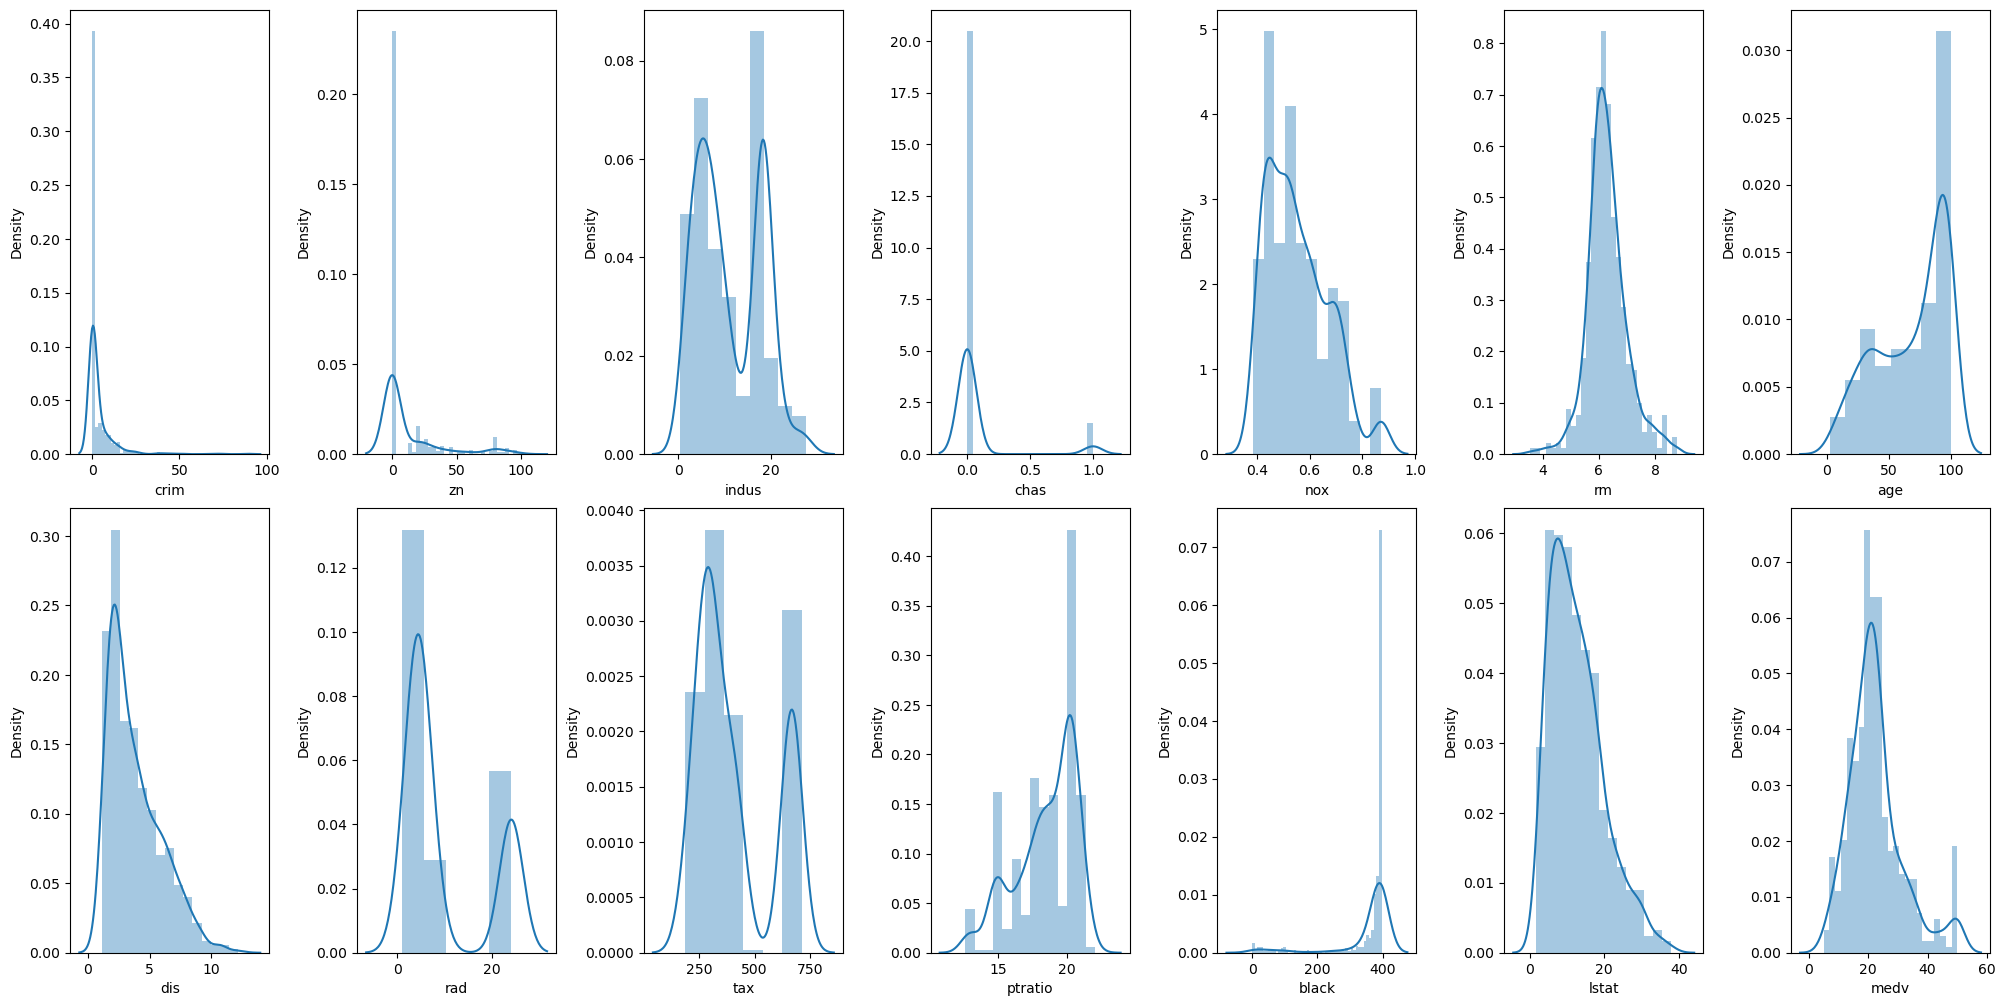

In [418]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in df.items():
    sb.distplot(value , ax=ax[ind])
    ind+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.5)

In [419]:
#Min-Max Normalization

cols=['crim','zn','tax','black']
for col in cols:
    minimum=min(df[col])
    maximum=max(df[col])
    df[col]=(df[col]-minimum)/(maximum-minimum)

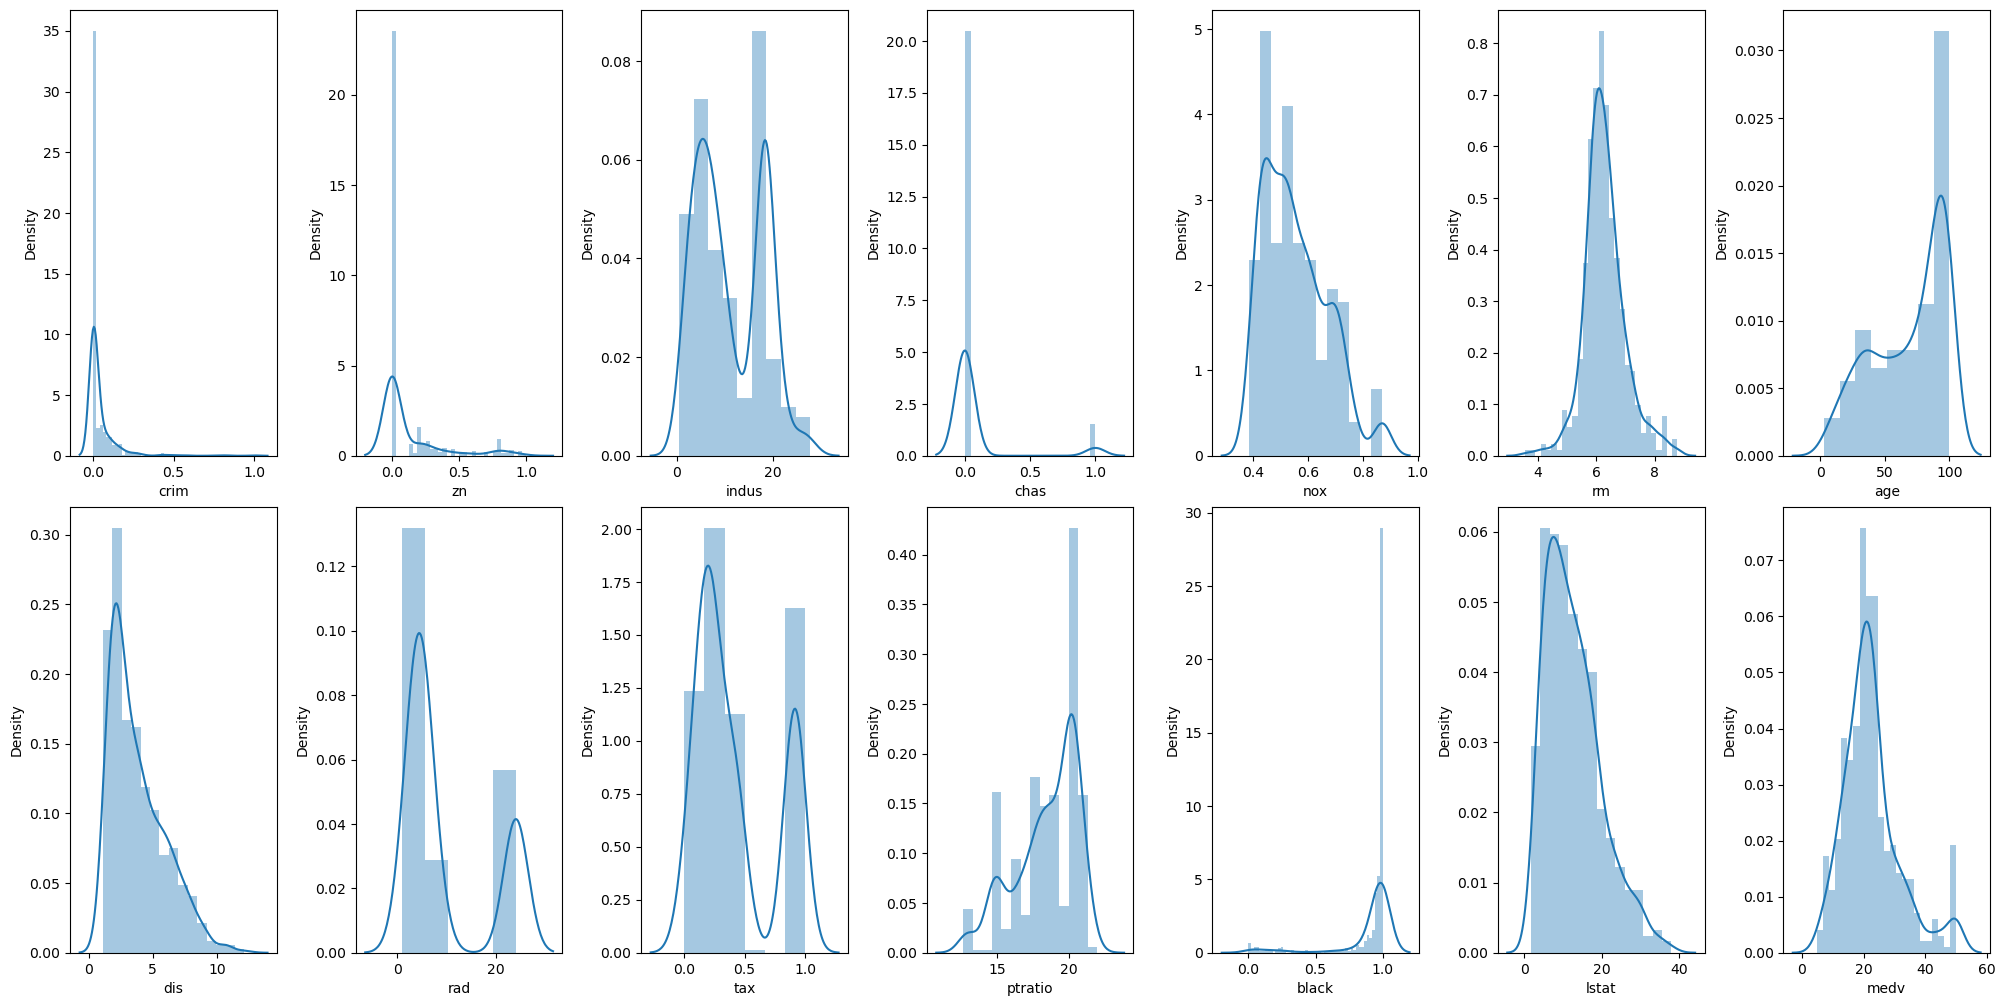

In [420]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in df.items():
    sb.distplot(value , ax=ax[ind])
    ind+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.5)

In [421]:
#Standardization

from sklearn import preprocessing
scalar= preprocessing.StandardScaler()

#fitting our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols =pd.DataFrame(scaled_cols,columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [422]:
for col in cols:
    df[col]=scaled_cols[col]

In [423]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,-0.419782,0.284830,2.31,0,0.538,6.575,65.2,4.0900,1,-0.666608,15.3,0.441052,4.98,24.0
1,-0.417339,-0.487722,7.07,0,0.469,6.421,78.9,4.9671,2,-0.987329,17.8,0.441052,9.14,21.6
2,-0.417342,-0.487722,7.07,0,0.469,7.185,61.1,4.9671,2,-0.987329,17.8,0.396427,4.03,34.7
3,-0.416750,-0.487722,2.18,0,0.458,6.998,45.8,6.0622,3,-1.106115,18.7,0.416163,2.94,33.4
4,-0.412482,-0.487722,2.18,0,0.458,7.147,54.2,6.0622,3,-1.106115,18.7,0.441052,5.33,36.2
5,-0.417044,-0.487722,2.18,0,0.458,6.430,58.7,6.0622,3,-1.106115,18.7,0.410571,5.21,28.7
6,-0.410243,0.048772,7.87,0,0.524,6.012,66.6,5.5605,5,-0.577519,15.2,0.426798,12.43,22.9
7,-0.403696,0.048772,7.87,0,0.524,6.172,96.1,5.9505,5,-0.577519,15.2,0.441052,19.15,27.1
8,-0.395935,0.048772,7.87,0,0.524,5.631,100.0,6.0821,5,-0.577519,15.2,0.328448,29.93,16.5
9,-0.400729,0.048772,7.87,0,0.524,6.004,85.9,6.5921,5,-0.577519,15.2,0.329325,17.10,18.9


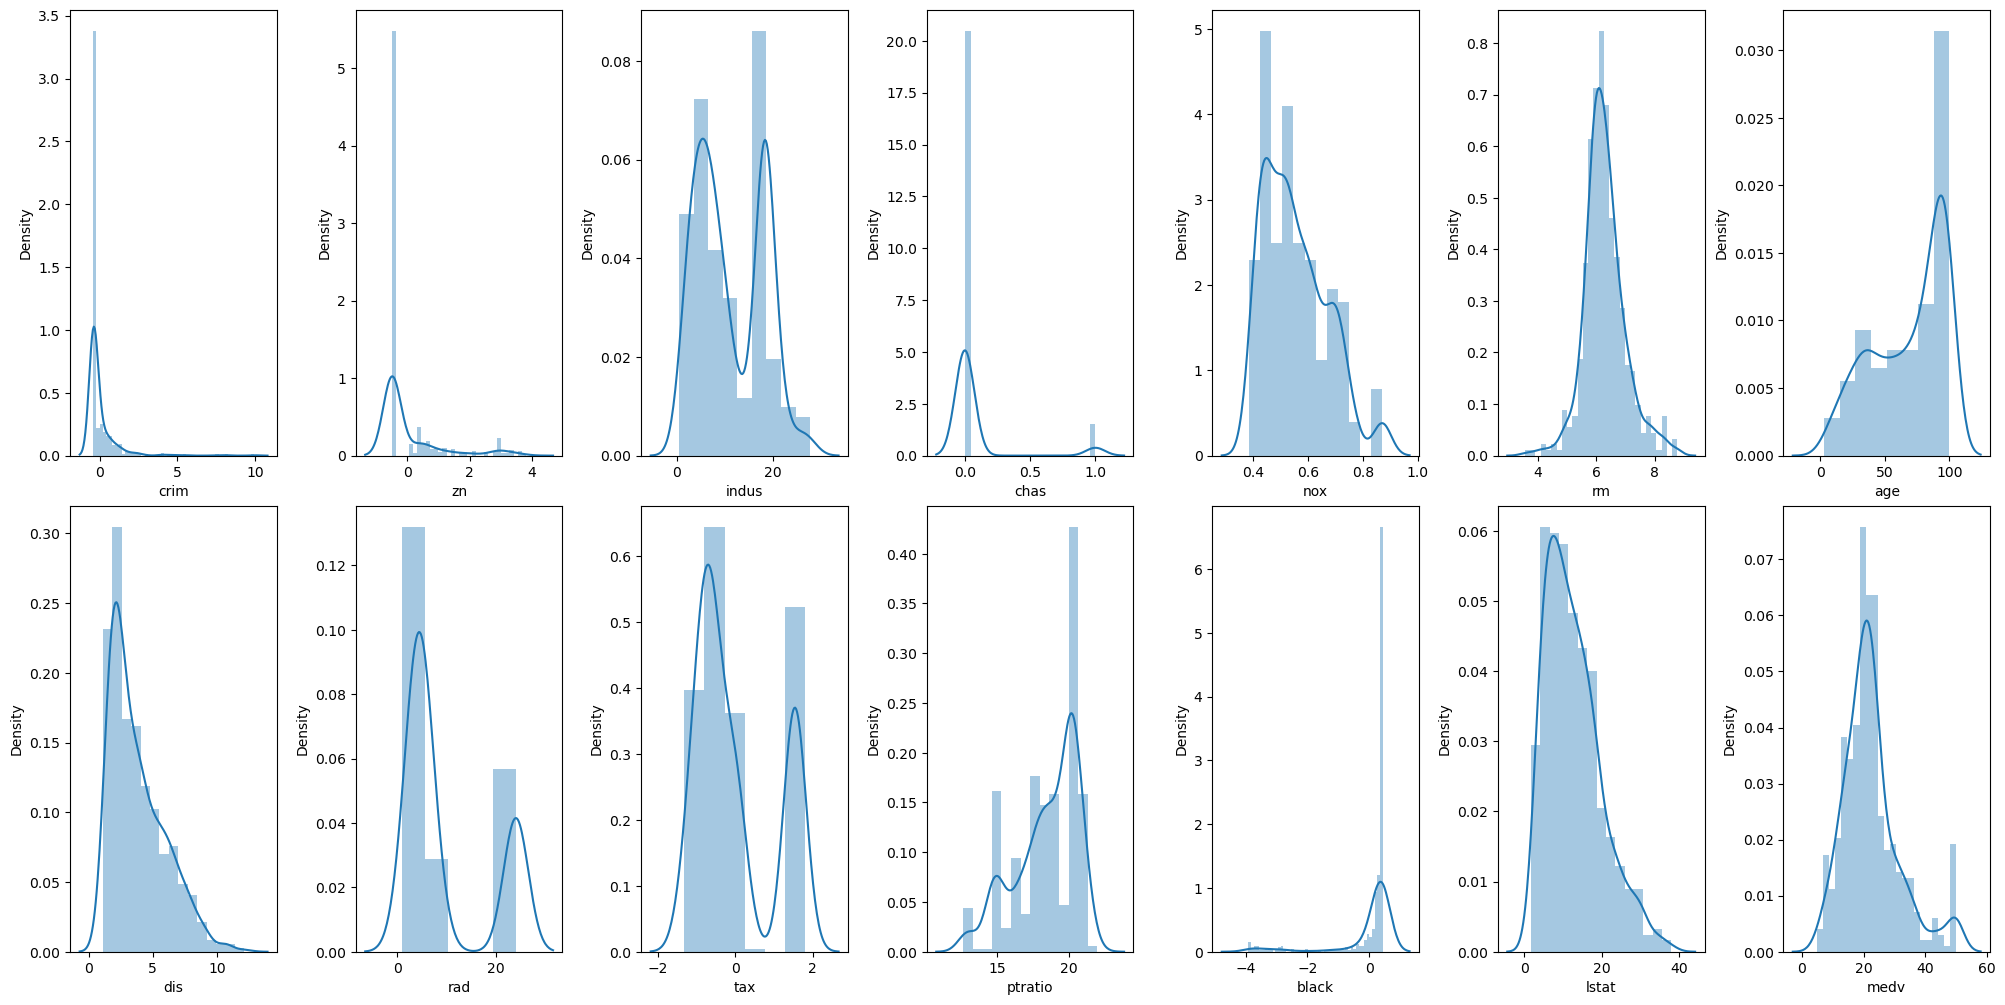

In [424]:
fig,ax = plt.subplots(ncols=7,nrows=2,figsize=(20,10))
ind=0
ax=ax.flatten()

for col,value in df.items():
    sb.distplot(value , ax=ax[ind])
    ind+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=0.5)

<AxesSubplot:>

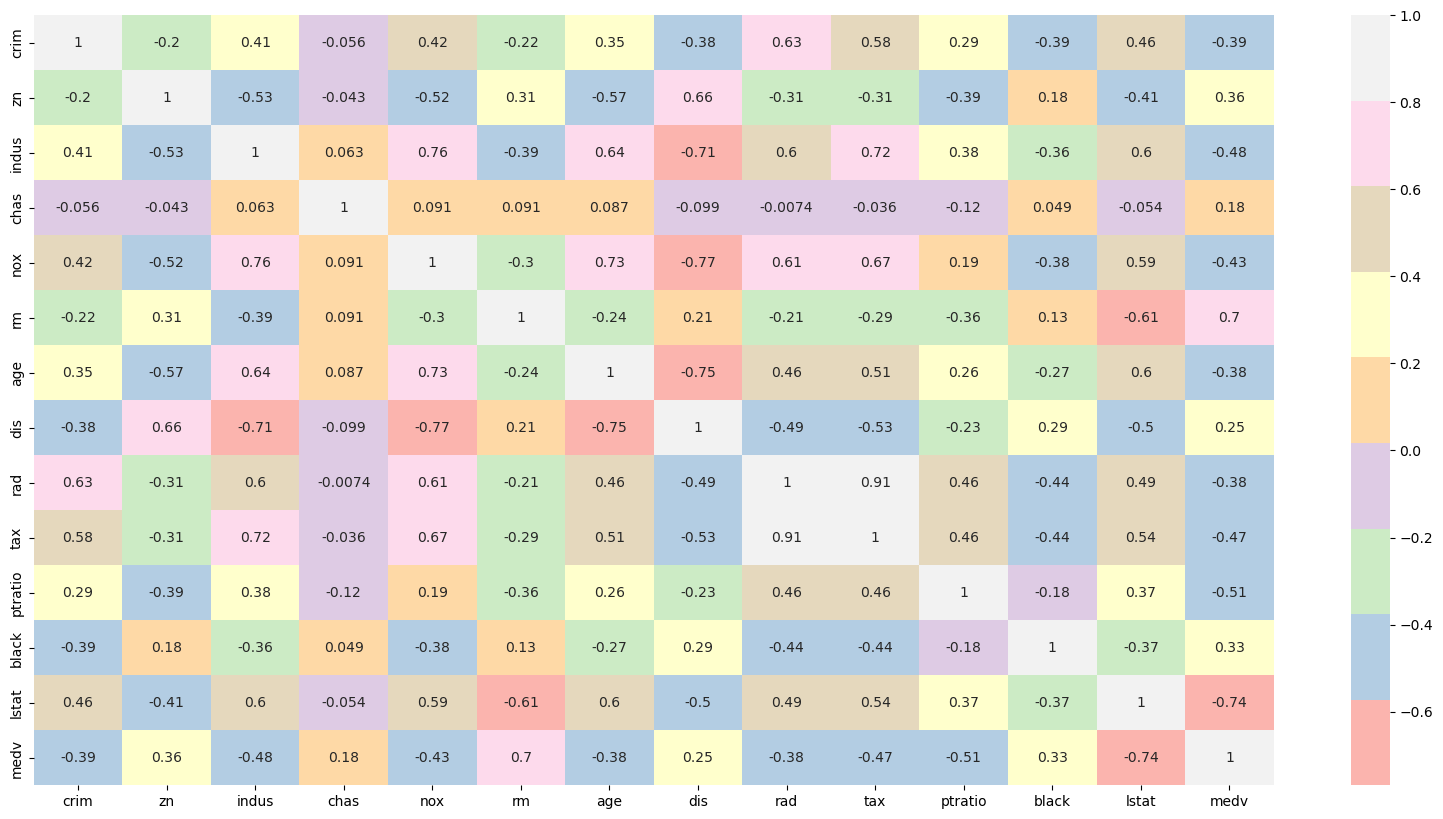

In [425]:
 #coorelation matrix

corr=df.corr()
plt.figure(figsize=(20,10))
sb.heatmap(corr,annot=True,cmap='Pastel1')

<AxesSubplot:xlabel='lstat', ylabel='medv'>

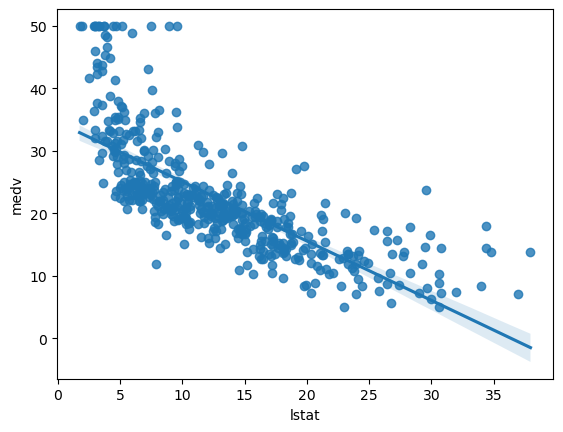

In [426]:
sb.regplot(y=df['medv'],x=df['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

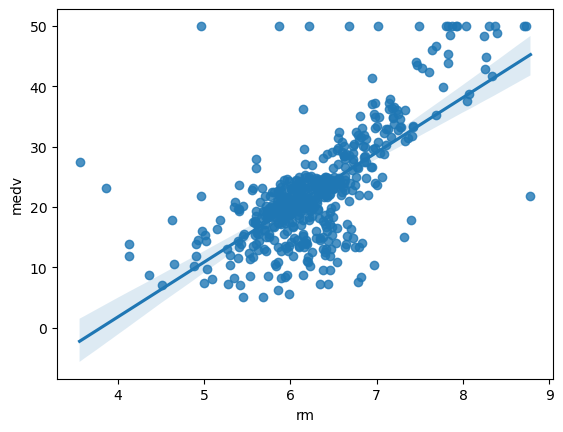

In [427]:
sb.regplot(y=df['medv'],x=df['rm'])

In [428]:
#input Split

x=df.drop(columns=['medv'],axis=1)
y=df['medv']

In [429]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model,x,y):
    #train model
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50)
    model.fit(x_train,y_train)
    
    #predict the training set
    pred=model.predict(x_test)
    
    #perform cross validation
    cvs=cross_val_score(model,x,y,scoring='neg_mean_squared_error', cv=5)
    cvs=np.abs(np.mean(cvs))
    
    print("Model Report")
    print("Mean Squared Error:",mean_squared_error(y_test,pred))
    print("Cross Value Score",cvs)

Model Report
Mean Squared Error: 26.522333763452483
Cross Value Score 37.13180746769893


<AxesSubplot:title={'center':'Model Coefficients'}>

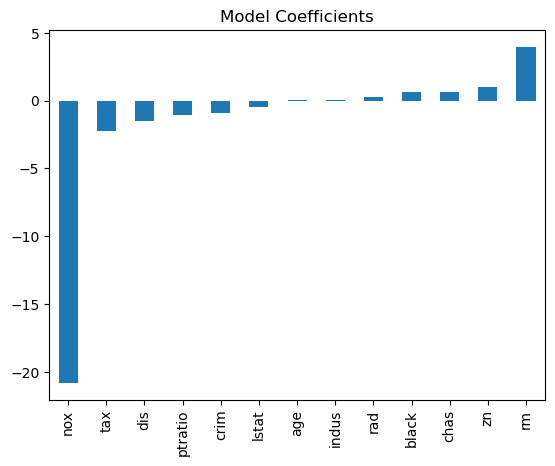

In [434]:
#Linear Regression

from sklearn.linear_model import LinearRegression
model=LinearRegression(normalize=True)
train(model,x,y)
coef=pd.Series(model.coef_,x.columns).sort_values()
coef.plot(kind='bar',title='Model Coefficients')

Model Report
Mean Squared Error: 7.578559716535428
Cross Value Score 20.93745731001746


<AxesSubplot:title={'center':'Feature Importance'}>

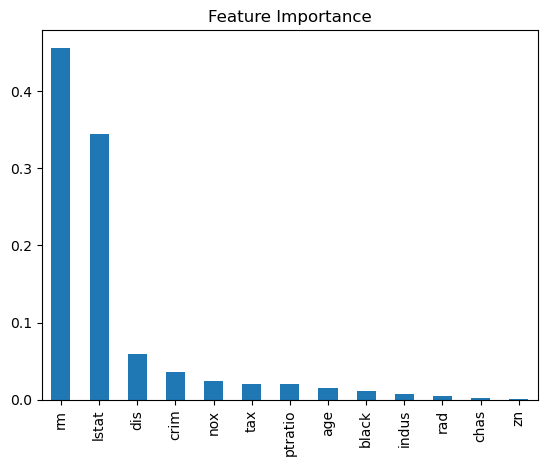

In [435]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
train(model,x,y)
coef= pd.Series(model.feature_importances_,x.columns).sort_values(ascending=False)
coef.plot(kind='bar',title='Feature Importance')

In [436]:
import pickle

In [439]:
pickle.dump(df,open('house_price_prediction.pkl','wb'))

In [ ]:
df.